In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soil-moisture-levels/Soil Moisture.csv


In [2]:
#Description : This program detects soil moisture,based off of data

# **Loading the data**

In [3]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = "/kaggle/input/soil-moisture-levels/Soil Moisture.csv"

In [5]:
#Load the data
df = pd.read_csv(url)
df

,ttime,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
0,2022-07-18 15:39:58,0.83,0.00,0.00,0.0,7463.0,6547.0,23.02,90.57,92849.25
1,2022-07-18 15:44:55,1.39,0.00,0.00,0.0,7576.0,10249.0,23.47,88.37,92848.31
2,2022-07-18 15:49:55,1.95,0.00,0.00,0.0,7576.0,12636.0,23.64,85.26,92844.82
3,2022-07-18 15:54:55,2.51,0.00,0.00,0.0,7463.0,8318.0,23.62,85.93,92834.94
4,2022-07-18 15:59:56,0.55,2.51,2.51,0.0,7463.0,4149.0,23.82,86.06,92815.25
...,...,...,...,...,...,...,...,...,...,...
20161,2023-03-10 08:59:16,0.55,1.11,27.38,3.2,327.0,6352.0,27.04,32.24,93560.72
20162,2023-03-10 09:27:12,1.11,1.11,27.38,3.2,327.0,7057.0,28.53,28.69,93574.12
20163,2023-03-10 09:55:12,1.67,1.11,27.38,4.8,327.0,7661.0,30.07,24.39,93571.75
20164,2023-03-10 10:23:12,0.55,1.67,27.93,4.0,327.0,8386.0,31.55,22.99,93558.36


In [6]:
#To display first five records
df.head(5)

,ttime,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
0,2022-07-18 15:39:58,0.83,0.00,0.00,0.0,7463.0,6547.0,23.02,90.57,92849.25
1,2022-07-18 15:44:55,1.39,0.00,0.00,0.0,7576.0,10249.0,23.47,88.37,92848.31
2,2022-07-18 15:49:55,1.95,0.00,0.00,0.0,7576.0,12636.0,23.64,85.26,92844.82
3,2022-07-18 15:54:55,2.51,0.00,0.00,0.0,7463.0,8318.0,23.62,85.93,92834.94
4,2022-07-18 15:59:56,0.55,2.51,2.51,0.0,7463.0,4149.0,23.82,86.06,92815.25


In [7]:
#To display last five records
df.tail(5)

,ttime,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
20161,2023-03-10 08:59:16,0.55,1.11,27.38,3.2,327.0,6352.0,27.04,32.24,93560.72
20162,2023-03-10 09:27:12,1.11,1.11,27.38,3.2,327.0,7057.0,28.53,28.69,93574.12
20163,2023-03-10 09:55:12,1.67,1.11,27.38,4.8,327.0,7661.0,30.07,24.39,93571.75
20164,2023-03-10 10:23:12,0.55,1.67,27.93,4.0,327.0,8386.0,31.55,22.99,93558.36
20165,2023-03-10 10:51:14,1.11,1.67,27.93,2.4,328.0,8954.0,32.68,20.85,93541.99


In [8]:
#To display soil moisture
df['sm']

0        7463.0
1        7576.0
2        7576.0
3        7463.0
4        7463.0
          ...  
20161     327.0
20162     327.0
20163     327.0
20164     327.0
20165     328.0
Name: sm, Length: 20166, dtype: float64

# **Describing the data**

In [9]:
#describe() method returns description of the data in the DataFrame.
df.describe()

,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
count,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000
mean,1.585495,2.581223,59.172185,0.729346,4339.095656,2891.423039,22.625972,78.329035,93154.619405
std,1.045641,1.288723,28.166706,1.795355,3077.733911,4277.275782,4.666760,24.007034,290.963485
min,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,8.610000,13.320000,92352.450000
25%,0.550000,1.670000,36.880000,0.000000,465.250000,2.000000,20.000000,61.690000,92976.272500
50%,1.110000,2.230000,51.400000,0.000000,6410.000000,165.500000,21.430000,88.220000,93152.930000
75%,2.230000,3.350000,77.110000,0.000000,7042.000000,5275.000000,26.110000,100.000000,93350.997500
max,6.700000,6.700000,153.660000,18.390000,7937.000000,19767.000000,36.880000,100.000000,94042.780000


In [10]:
#To display number of rows and columns
df.shape

(20166, 10)

In [11]:
#To display number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ttime   20166 non-null  object 
 1   pm1     20166 non-null  float64
 2   pm2     20166 non-null  float64
 3   pm3     20166 non-null  float64
 4   am      20166 non-null  float64
 5   sm      20166 non-null  float64
 6   lum     20166 non-null  float64
 7   temp    20166 non-null  float64
 8   humd    20166 non-null  float64
 9   pres    20166 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
#To return data type of each column. 
df.dtypes

ttime     object
pm1      float64
pm2      float64
pm3      float64
am       float64
sm       float64
lum      float64
temp     float64
humd     float64
pres     float64
dtype: object

In [14]:
#To return the number of unique values for each column
df.nunique()

ttime    20166
pm1         20
pm2         17
pm3        224
am          23
sm         924
lum       6707
temp      1979
humd      6346
pres     17581
dtype: int64

In [15]:
#To count the number of not empty values for each row
df.count()

ttime    20166
pm1      20166
pm2      20166
pm3      20166
am       20166
sm       20166
lum      20166
temp     20166
humd     20166
pres     20166
dtype: int64

# **Data wrangling**

In [16]:
#To display the number of empty values (NaN,NAN,na) in each column
df.isna()

,ttime,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20161,False,False,False,False,False,False,False,False,False,False
20162,False,False,False,False,False,False,False,False,False,False
20163,False,False,False,False,False,False,False,False,False,False
20164,False,False,False,False,False,False,False,False,False,False


In [17]:
#Count the number of empty values (NaN,NAN,na) in each column
df.isna().sum()

ttime    0
pm1      0
pm2      0
pm3      0
am       0
sm       0
lum      0
temp     0
humd     0
pres     0
dtype: int64

In [18]:
#Dropping unnecessary column 
df.drop(labels=['am'],axis=1,inplace=True)

In [19]:
#Checking whether the column has been removed or not
df.head()

,ttime,pm1,pm2,pm3,sm,lum,temp,humd,pres
0,2022-07-18 15:39:58,0.83,0.00,0.00,7463.0,6547.0,23.02,90.57,92849.25
1,2022-07-18 15:44:55,1.39,0.00,0.00,7576.0,10249.0,23.47,88.37,92848.31
2,2022-07-18 15:49:55,1.95,0.00,0.00,7576.0,12636.0,23.64,85.26,92844.82
3,2022-07-18 15:54:55,2.51,0.00,0.00,7463.0,8318.0,23.62,85.93,92834.94
4,2022-07-18 15:59:56,0.55,2.51,2.51,7463.0,4149.0,23.82,86.06,92815.25


In [20]:
#Checking number of rows and columns again
df.shape

(20166, 9)

# **Data Analysis**

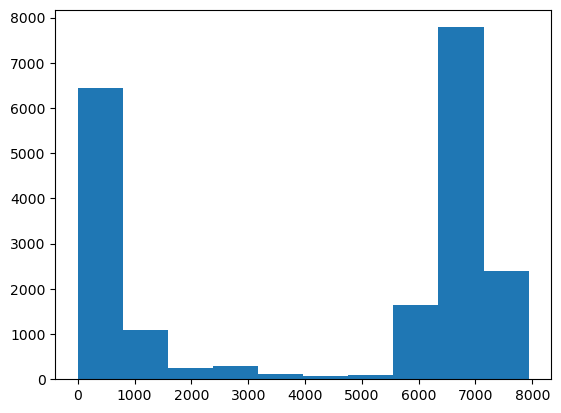

In [21]:
#Visualization of data using matplotlib.pyplot library
import matplotlib.pyplot as plt
plt.hist(df['sm'])
plt.show()

In [22]:
#Finding the correlation 
#corr() function tells us how one column can influence the other
data=df.iloc[:,1:9].corr()
data

,pm1,pm2,pm3,sm,lum,temp,humd,pres
pm1,1.000000,0.579420,0.559228,0.428794,0.043378,0.023540,0.226858,-0.342037
pm2,0.579420,1.000000,0.925259,0.702341,0.067508,0.039710,0.372843,-0.562632
pm3,0.559228,0.925259,1.000000,0.712649,0.081057,0.050155,0.376119,-0.573092
sm,0.428794,0.702341,0.712649,1.000000,0.089096,0.045897,0.545820,-0.637177
lum,0.043378,0.067508,0.081057,0.089096,1.000000,0.484641,-0.264182,-0.030602
temp,0.023540,0.039710,0.050155,0.045897,0.484641,1.000000,-0.645547,-0.071332
humd,0.226858,0.372843,0.376119,0.545820,-0.264182,-0.645547,1.000000,-0.369464
pres,-0.342037,-0.562632,-0.573092,-0.637177,-0.030602,-0.071332,-0.369464,1.000000


<Axes: >

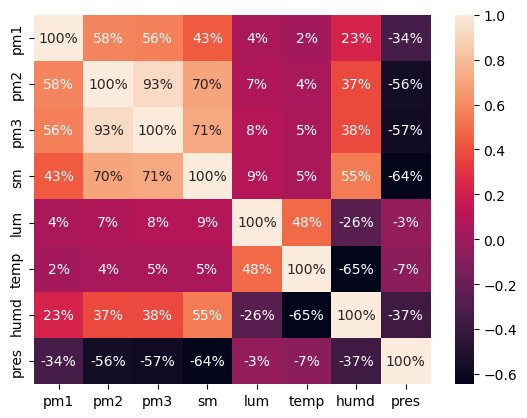

In [23]:
#Visualize the correlation of above data using heatmap
sns.heatmap(data,annot=True,fmt='.0%')

# **Machine Learning**

In [24]:
#Dividing data into X and Y(converting into numpy)
X=df.iloc[:,[1,2,3,5,6,7,8]].values
Y=df.iloc[:,4].values

In [25]:
print(X)

[[8.300000e-01 0.000000e+00 0.000000e+00 ... 2.302000e+01 9.057000e+01
  9.284925e+04]
 [1.390000e+00 0.000000e+00 0.000000e+00 ... 2.347000e+01 8.837000e+01
  9.284831e+04]
 [1.950000e+00 0.000000e+00 0.000000e+00 ... 2.364000e+01 8.526000e+01
  9.284482e+04]
 ...
 [1.670000e+00 1.110000e+00 2.738000e+01 ... 3.007000e+01 2.439000e+01
  9.357175e+04]
 [5.500000e-01 1.670000e+00 2.793000e+01 ... 3.155000e+01 2.299000e+01
  9.355836e+04]
 [1.110000e+00 1.670000e+00 2.793000e+01 ... 3.268000e+01 2.085000e+01
  9.354199e+04]]


In [26]:
print(Y)

[7463. 7576. 7576. ...  327.  327.  328.]


In [27]:
#Splitting dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train

array([[-0.45307831,  1.45957952,  1.80162477, ...,  0.35900234,
         0.19703726, -0.25900487],
       [-0.9857129 , -1.13997327, -0.81078524, ..., -0.78608658,
        -0.403716  ,  0.92933768],
       [-0.45307831,  0.15980312,  0.37641627, ..., -0.38648707,
         0.90277654,  0.05466617],
       ...,
       [-0.45307831, -0.27345567, -0.27668623, ..., -0.22535823,
         0.62364707,  0.48257118],
       [ 0.61219089, -0.27345567, -0.39533555, ...,  0.34181527,
        -0.07875931, -1.14927404],
       [ 2.74272928,  1.02632072,  1.30683941, ..., -0.28336461,
         0.77612675, -1.27962102]])

In [30]:
X_test

array([[-9.85712905e-01, -7.06714473e-01, -4.94150946e-01, ...,
        -7.53860815e-01,  7.96957307e-01,  1.16718484e+00],
       [ 7.95562910e-02, -7.06714473e-01, -8.50453070e-01, ...,
        -7.02299587e-01,  6.16564683e-01,  1.26338187e+00],
       [ 7.95562910e-02, -7.06714473e-01, -9.09954817e-01, ...,
        -1.60462107e+00,  9.02776538e-01,  1.55602698e+00],
       ...,
       [ 6.12190889e-01,  1.59803125e-01,  6.34409892e-04, ...,
        -3.45667764e-01,  8.88195148e-01, -4.72699703e-01],
       [ 6.12190889e-01,  1.59803125e-01,  1.78785472e-01, ...,
        -2.12467927e-01,  8.67781202e-01, -4.62152385e-01],
       [-9.85712905e-01, -1.13997327e+00, -1.04843805e+00, ...,
        -1.90109812e+00,  9.02776538e-01,  7.15299281e-01]])

In [31]:
Y_train

array([7042.,  430., 6849., ..., 2439., 6250., 6410.])

In [32]:
Y_test

array([6849.,  414.,  359., ..., 7143., 6757.,  331.])

**Model 1: Linear Regression**

In [33]:
from sklearn.linear_model import LinearRegression  
regressor1= LinearRegression()  
regressor1.fit(X_train, Y_train)

LinearRegression()

In [34]:
pred1=regressor1.predict(X_test)
pred1

array([3535.42463097, 3028.02218979, 2283.75536225, ..., 5862.63312688,
       6090.41181696, 2005.80570659])

In [35]:
from sklearn.metrics import r2_score
rscore1=r2_score(Y_test,pred1)
print("R-squared:",rscore1)

R-squared: 0.7222420104895361


**Model 2: XGBoost Regressor**

In [36]:
import xgboost as xgb
regressor2=xgb.XGBRegressor()
regressor2.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [37]:
pred2=regressor2.predict(X_test)
pred2

array([6717.4365 ,  401.24396,  351.56387, ..., 7170.2886 , 6577.261  ,
        356.85605], dtype=float32)

In [38]:
from sklearn.metrics import r2_score
rscore2=r2_score(Y_test,pred2)
print("R-squared:",rscore2)

R-squared: 0.9796308619186347


**Model 3: Decision Tree Regressor**

In [39]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor()
regressor3.fit(X_train, Y_train)

DecisionTreeRegressor()

In [40]:
pred3=regressor3.predict(X_test)
pred3

array([6849.,  405.,  359., ..., 7143., 6250.,  331.])

In [41]:
from sklearn.metrics import r2_score
rscore3=r2_score(Y_test,pred3)
print("R-squared:",rscore3)

R-squared: 0.9687933451268324


**Taking Different Features**

In [42]:
#Dividing data into X and Y(converting into numpy)
x=df.iloc[:,[1,2,3]].values
y=df.iloc[:,4].values

In [43]:
print(x)

[[ 0.83  0.    0.  ]
 [ 1.39  0.    0.  ]
 [ 1.95  0.    0.  ]
 ...
 [ 1.67  1.11 27.38]
 [ 0.55  1.67 27.93]
 [ 1.11  1.67 27.93]]


In [44]:
print(y)

[7463. 7576. 7576. ...  327.  327.  328.]


In [45]:
#Splitting dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
x_train

array([[-0.45307831,  1.45957952,  1.80162477],
       [-0.9857129 , -1.13997327, -0.81078524],
       [-0.45307831,  0.15980312,  0.37641627],
       ...,
       [-0.45307831, -0.27345567, -0.27668623],
       [ 0.61219089, -0.27345567, -0.39533555],
       [ 2.74272928,  1.02632072,  1.30683941]])

In [48]:
x_test

array([[-9.85712905e-01, -7.06714473e-01, -4.94150946e-01],
       [ 7.95562910e-02, -7.06714473e-01, -8.50453070e-01],
       [ 7.95562910e-02, -7.06714473e-01, -9.09954817e-01],
       ...,
       [ 6.12190889e-01,  1.59803125e-01,  6.34409892e-04],
       [ 6.12190889e-01,  1.59803125e-01,  1.78785472e-01],
       [-9.85712905e-01, -1.13997327e+00, -1.04843805e+00]])

In [49]:
y_train

array([7042.,  430., 6849., ..., 2439., 6250., 6410.])

In [50]:
y_test

array([6849.,  414.,  359., ..., 7143., 6757.,  331.])

**Model 1: Linear Regression**

In [51]:
from sklearn.linear_model import LinearRegression  
regressor4= LinearRegression()  
regressor4.fit(x_train, y_train)

LinearRegression()

In [52]:
pred4=regressor4.predict(x_test)
pred4

array([2989.0226249 , 2569.25781203, 2490.25380205, ..., 4510.46432485,
       4747.00609282, 1860.80882529])

In [53]:
from sklearn.metrics import r2_score
rscore4=r2_score(y_test,pred4)
print("R-squared:",rscore4)

R-squared: 0.5199385350350991


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score
def regression_report(y_true, y_pred):
    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]
    
    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}') 

In [55]:
print(regression_report(y_test, pred4))

Metrics for regression:
      mean absolute error:             1970.378
    median absolute error:             1998.457
       mean squared error:          4541225.140
                max error:             5789.329
                 r2 score:                0.520
 explained variance score:                0.520
None


**Model 2 : XGBoost Regressor**

In [56]:
import xgboost as xgb
regressor5=xgb.XGBRegressor()
regressor5.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [57]:
pred5=regressor5.predict(x_test)
pred5

array([6621.6406 ,  397.9831 ,  371.6124 , ..., 7158.1206 , 6700.095  ,
        336.70276], dtype=float32)

In [58]:
from sklearn.metrics import r2_score
rscore5=r2_score(y_test,pred5)
print("R-squared:",rscore5)

R-squared: 0.9584707433712214


In [59]:
print(regression_report(y_test, pred5))

Metrics for regression:
      mean absolute error:              250.971
    median absolute error:               64.482
       mean squared error:           392853.245
                max error:             4065.497
                 r2 score:                0.958
 explained variance score:                0.958
None


**Model 3: Decision Tree Regressor**

In [60]:
from sklearn.tree import DecisionTreeRegressor
regressor6 = DecisionTreeRegressor()
regressor6.fit(x_train, y_train)

DecisionTreeRegressor()

In [61]:
pred6=regressor6.predict(x_test)
pred6

array([6625.88043478,  398.65714286,  372.24074074, ..., 7155.90410959,
       6694.55932203,  336.51308901])

In [62]:
from sklearn.metrics import r2_score
rscore6=r2_score(y_test,pred6)
print("R-squared:",rscore6)

R-squared: 0.9583028182602895


In [63]:
print(regression_report(y_test, pred6))

Metrics for regression:
      mean absolute error:              251.765
    median absolute error:               68.667
       mean squared error:           394441.762
                max error:             4062.912
                 r2 score:                0.958
 explained variance score:                0.958
None
